In [4]:
%matplotlib inline

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegressionCV

In [6]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


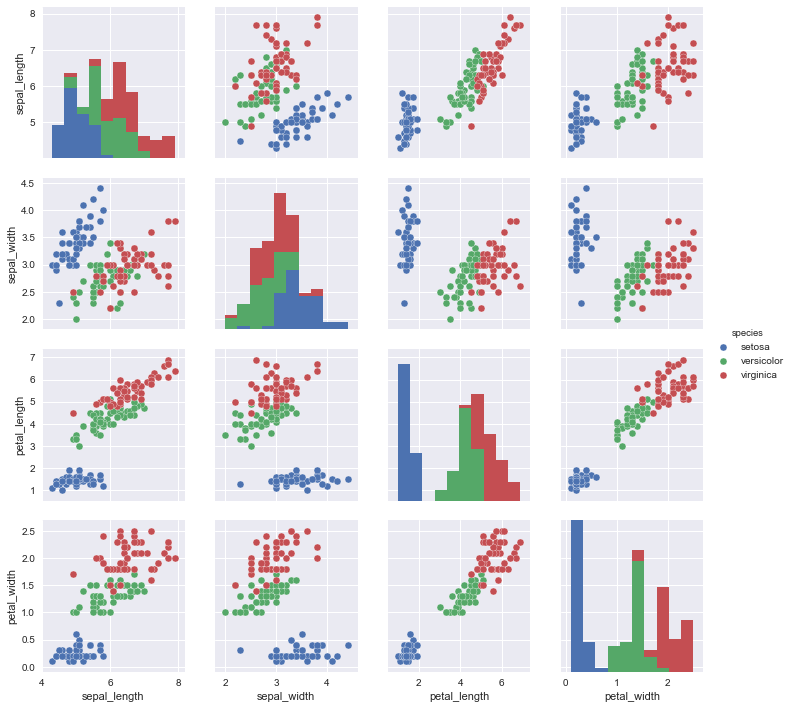

In [7]:
sns.pairplot(iris, hue='species')

### scikit-learn

In [11]:
X = iris.values[:, 0:4]
y = iris.values[:, 4]

In [12]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, random_state=0)

In [13]:
lr = LogisticRegressionCV()
lr.fit(train_X, train_y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [14]:
pred_y = lr.predict(test_X)
print("Test fraction correct (Accuracy) = {:.2f}".format(lr.score(test_X, test_y)))

Test fraction correct (Accuracy) = 0.83


### keras

In [16]:
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

train_y_ohe = one_hot_encode_object_array(train_y)
test_y_ohe = one_hot_encode_object_array(test_y)

In [91]:
# build simple network
# 4 features in the input layer (the four flower measurements),
# 3 classes in the ouput layer (corresponding to the 3 species), and 16 hidden units

model = Sequential()

model.add(Dense(16, input_shape=(4,)))
model.add(Activation('sigmoid'))
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [102]:
model.fit(train_X, train_y_ohe, epochs=10, batch_size=1)

Epoch 1/10
75/75 [==============================] - 0s - loss: 0.2164 - acc: 0.9467     
Epoch 2/10
75/75 [==============================] - 0s - loss: 0.2102 - acc: 0.9600     
Epoch 3/10
75/75 [==============================] - 0s - loss: 0.2100 - acc: 0.9600     
Epoch 4/10
75/75 [==============================] - 0s - loss: 0.2018 - acc: 0.9867     
Epoch 5/10
75/75 [==============================] - 0s - loss: 0.1991 - acc: 0.9600     
Epoch 6/10
75/75 [==============================] - 0s - loss: 0.1971 - acc: 0.9733     
Epoch 7/10
75/75 [==============================] - 0s - loss: 0.1972 - acc: 0.9467     
Epoch 8/10
75/75 [==============================] - 0s - loss: 0.1891 - acc: 0.9867     
Epoch 9/10
75/75 [==============================] - 0s - loss: 0.1830 - acc: 0.9733     
Epoch 10/10
75/75 [==============================] - 0s - loss: 0.1817 - acc: 0.9600     


In [103]:
loss, accuracy = model.evaluate(test_X, test_y_ohe, verbose=0)
print("Test fraction correct (Accuracy) = {:.2f}".format(accuracy))

Test fraction correct (Accuracy) = 0.99
